# <center>Kaggle's [Loan](https://www.kaggle.com/datasets/mirzahasnine/loan-data-set) Dataset</center>
#### <center>by Hector Cadeaux</center>

### <center>Data Dictionary</center>
Gender: Female/Male/Nan<br>
Married: Yes/No<br>
Dependents: 0, 1, 2, 3+ (to be recoded)<br>
Education: Graduate/Not Graduate<br>
Self_Employed: Whether an applicant is self-employeed<br>
Applicant_Income: Amount of applicant income<br>
Coapplicant_Income: Amount of co-applicant income<br>
Loan_Amount: Amount of loan<br>
Term: Length of the loan<br>
Credit_History: Whether the applicant has credit history<br>
Area: Urban, Semiurban and Rural<br>
<br>
<br>
#### Imports

In [31]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd


In [32]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
loans= pd.read_csv('loan_train.csv')
loans

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,290000,0.0,7100000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,410600,0.0,4000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,807200,24000.0,25300000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,758300,0.0,18700000,360.0,1.0,Urban,Y


In [34]:
loans.describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History
count,6.140000e+02,6.140000e+02,6.140000e+02,600.00000,564.000000
mean,5.403459e+05,1.621246e+05,1.414104e+07,342.00000,0.842199
std,6.109042e+05,2.926248e+05,8.815682e+06,65.12041,0.364878
min,1.500000e+04,0.000000e+00,0.000000e+00,12.00000,0.000000
25%,2.877500e+05,0.000000e+00,9.800000e+06,360.00000,1.000000
50%,3.812500e+05,1.188500e+05,1.250000e+07,360.00000,1.000000
75%,5.795000e+05,2.297250e+05,1.647500e+07,360.00000,1.000000
max,8.100000e+06,4.166700e+06,7.000000e+07,480.00000,1.000000


In [35]:
loans.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Term',
       'Credit_History', 'Area', 'Status'],
      dtype='object')

In [36]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                600 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB


In [37]:
val_cols=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Term',
       'Credit_History', 'Area', 'Status']

In [38]:
for col in val_cols:
    print(loans[col].value_counts())
    print("{} empty cells".format(loans[col].isna().sum()))

Male      489
Female    112
Name: Gender, dtype: int64
13 empty cells
Yes    398
No     213
Name: Married, dtype: int64
3 empty cells
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
15 empty cells
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
0 empty cells
No     500
Yes     82
Name: Self_Employed, dtype: int64
32 empty cells
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Term, dtype: int64
14 empty cells
1.0    475
0.0     89
Name: Credit_History, dtype: int64
50 empty cells
Semiurban    233
Urban        202
Rural        179
Name: Area, dtype: int64
0 empty cells
Y    422
N    192
Name: Status, dtype: int64
0 empty cells


In [39]:
for col in loans.loc[:,~(loans.columns.isin(val_cols))].columns:
    print("{} has {} empty cells".format(col,loans[col].isna().sum()))

Applicant_Income has 0 empty cells
Coapplicant_Income has 0 empty cells
Loan_Amount has 0 empty cells


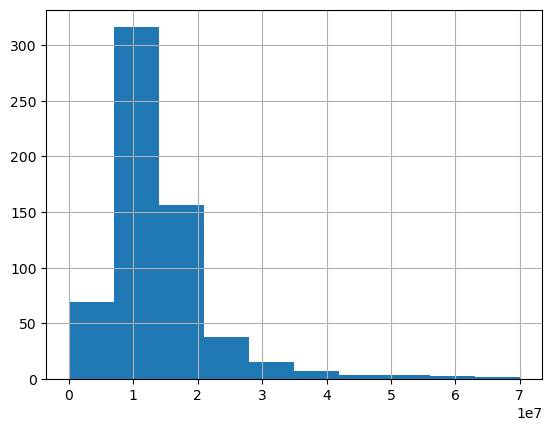

In [40]:
loans["Loan_Amount"].hist()

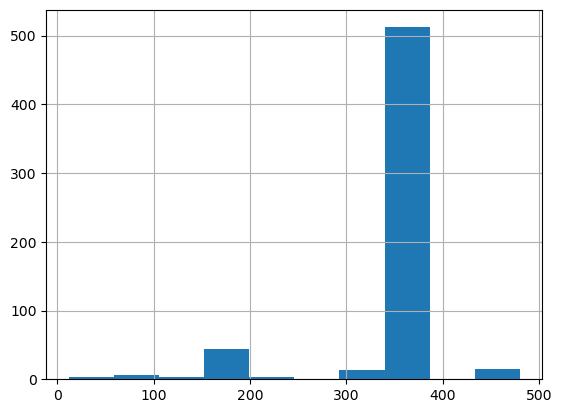

In [41]:
loans["Term"].hist()

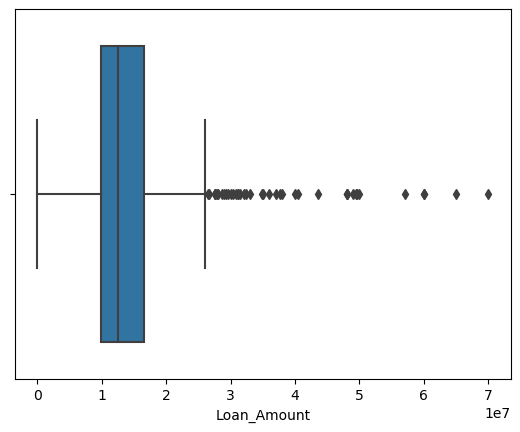

In [42]:
sns.boxplot(data=loans,x="Loan_Amount", hue="Gender")

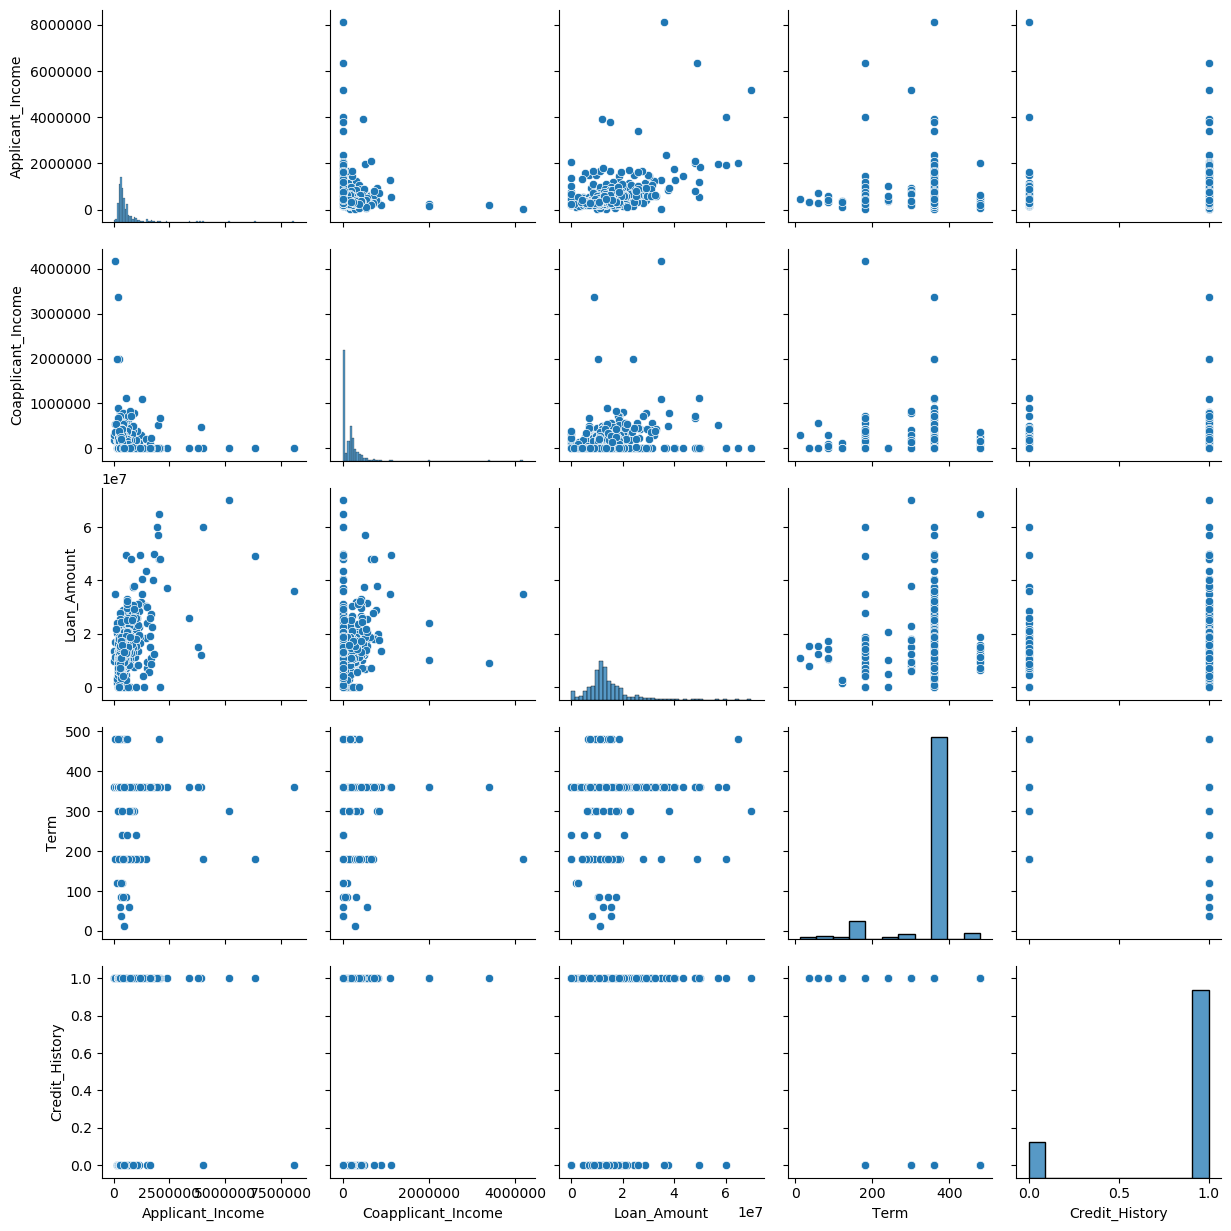

In [43]:
sns.pairplot(loans)

In [44]:
loans[loans["Gender"].isna()]

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
23,NaN,Yes,2,Not Graduate,No,336500,191700.0,11200000,360.0,0.0,Rural,N
126,NaN,Yes,3+,Graduate,No,2380300,0.0,37000000,360.0,1.0,Rural,Y
171,NaN,Yes,3+,Graduate,No,5176300,0.0,70000000,300.0,1.0,Urban,Y
188,NaN,Yes,0,Graduate,Yes,67400,529600.0,16800000,360.0,1.0,Rural,Y
314,NaN,Yes,0,Graduate,No,247300,184300.0,15900000,360.0,1.0,Rural,N
334,NaN,Yes,1,Graduate,Yes,983300,183300.0,18200000,180.0,1.0,Urban,Y
460,NaN,Yes,0,Graduate,Yes,208300,408300.0,16000000,360.0,NaN,Semiurban,Y
467,NaN,Yes,0,Graduate,No,1669200,0.0,11000000,360.0,1.0,Semiurban,Y
477,NaN,Yes,2,Graduate,No,287300,187200.0,13200000,360.0,0.0,Semiurban,N
507,NaN,No,0,Graduate,No,358300,0.0,9600000,360.0,1.0,Urban,N


In [45]:
loans[loans["Married"].isna()]

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
104,Male,NaN,NaN,Graduate,No,381600,75400.0,16000000,360.0,1.0,Urban,Y
228,Male,NaN,NaN,Graduate,No,475800,0.0,15800000,480.0,1.0,Semiurban,Y
435,Female,NaN,NaN,Graduate,No,1004700,0.0,0,240.0,1.0,Semiurban,Y


In [46]:
loans[loans["Dependents"].isna()]

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
102,Male,Yes,NaN,Graduate,No,1365000,0.0,0,360.0,1.0,Urban,Y
104,Male,NaN,NaN,Graduate,No,381600,75400.0,16000000,360.0,1.0,Urban,Y
120,Male,Yes,NaN,Graduate,No,566700,266700.0,18000000,360.0,1.0,Rural,Y
226,Male,Yes,NaN,Not Graduate,Yes,473500,0.0,13800000,360.0,1.0,Urban,N
228,Male,NaN,NaN,Graduate,No,475800,0.0,15800000,480.0,1.0,Semiurban,Y
293,Female,No,NaN,Graduate,No,541700,0.0,14300000,480.0,0.0,Urban,N
301,Male,Yes,NaN,Not Graduate,No,287500,175000.0,10500000,360.0,1.0,Semiurban,Y
332,Male,No,NaN,Graduate,No,283300,0.0,7100000,360.0,1.0,Urban,Y
335,Male,Yes,NaN,Graduate,Yes,550300,449000.0,7000000,NaN,1.0,Semiurban,Y
346,Male,Yes,NaN,Not Graduate,No,352300,323000.0,15200000,360.0,0.0,Rural,N


In [47]:
loans[["Gender","Education"]].value_counts()

Gender  Education   
Male    Graduate        376
        Not Graduate    113
Female  Graduate         92
        Not Graduate     20
dtype: int64

In [48]:
loans["Status"]= loans["Status"].replace(["Y","N"],[1,0])
loans

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,290000,0.0,7100000,360.0,1.0,Rural,1
610,Male,Yes,3+,Graduate,No,410600,0.0,4000000,180.0,1.0,Rural,1
611,Male,Yes,1,Graduate,No,807200,24000.0,25300000,360.0,1.0,Urban,1
612,Male,Yes,2,Graduate,No,758300,0.0,18700000,360.0,1.0,Urban,1


In [49]:
recode_dict={"Gender":{'Male':"1", 'Female':"0", np.nan:"0"},
                "Married":{'Yes':"1",'No':"0",np.nan:"0"},
				"Dependents":{"3+":"4",np.nan:"2" },#average number of children per family is 2
                "Education":{"Graduate":"1", "Not Graduate":"0"},
				"Self_Employed":{"Yes":"1","No": "0",np.nan:"1"},
				"Term":{np.nan:360},
				"Credit_History":{np.nan:"0"}
                }

In [50]:
for key in recode_dict.keys():
    for llave, values in recode_dict[key].items():
        loans[key] = loans[key].replace(llave,values)

In [51]:
loans

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,1,0,0,1,0,584900,0.0,15000000,360.0,1.0,Urban,1
1,1,1,1,1,0,458300,150800.0,12800000,360.0,1.0,Rural,0
2,1,1,0,1,1,300000,0.0,6600000,360.0,1.0,Urban,1
3,1,1,0,0,0,258300,235800.0,12000000,360.0,1.0,Urban,1
4,1,0,0,1,0,600000,0.0,14100000,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,290000,0.0,7100000,360.0,1.0,Rural,1
610,1,1,4,1,0,410600,0.0,4000000,180.0,1.0,Rural,1
611,1,1,1,1,0,807200,24000.0,25300000,360.0,1.0,Urban,1
612,1,1,2,1,0,758300,0.0,18700000,360.0,1.0,Urban,1


In [52]:
loans.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Term                  0
Credit_History        0
Area                  0
Status                0
dtype: int64

In [53]:
loan_t = pd.read_csv('loan_test.csv')
loan_t

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area
0,Male,Yes,0,Graduate,No,572000,0,11000000,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,307600,150000,12600000,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,500000,180000,20800000,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,234000,254600,10000000,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,327600,0,7800000,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,400900,177700,11300000,360.0,1.0,Urban
363,Male,Yes,0,Graduate,No,415800,70900,11500000,360.0,1.0,Urban
364,Male,No,0,Graduate,No,325000,199300,12600000,360.0,NaN,Semiurban
365,Male,Yes,0,Graduate,No,500000,239300,15800000,360.0,1.0,Rural


In [54]:
loan_t.isna().sum()

Gender                11
Married                0
Dependents            10
Education              0
Self_Employed         23
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                   6
Credit_History        29
Area                   0
dtype: int64

In [55]:
for key in recode_dict.keys():
    for llave, values in recode_dict[key].items():
        loan_t[key] = loan_t[key].replace(llave,values)

In [56]:
loan_t.describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term
count,3.670000e+02,3.670000e+02,3.670000e+02,367.000000
mean,4.805599e+05,1.569578e+05,1.342779e+07,342.822888
std,4.910685e+05,2.334232e+05,6.296143e+06,64.658402
min,0.000000e+00,0.000000e+00,0.000000e+00,6.000000
25%,2.864000e+05,0.000000e+00,1.000000e+07,360.000000
50%,3.786000e+05,1.025000e+05,1.250000e+07,360.000000
75%,5.060000e+05,2.430500e+05,1.575000e+07,360.000000
max,7.252900e+06,2.400000e+06,5.500000e+07,480.000000


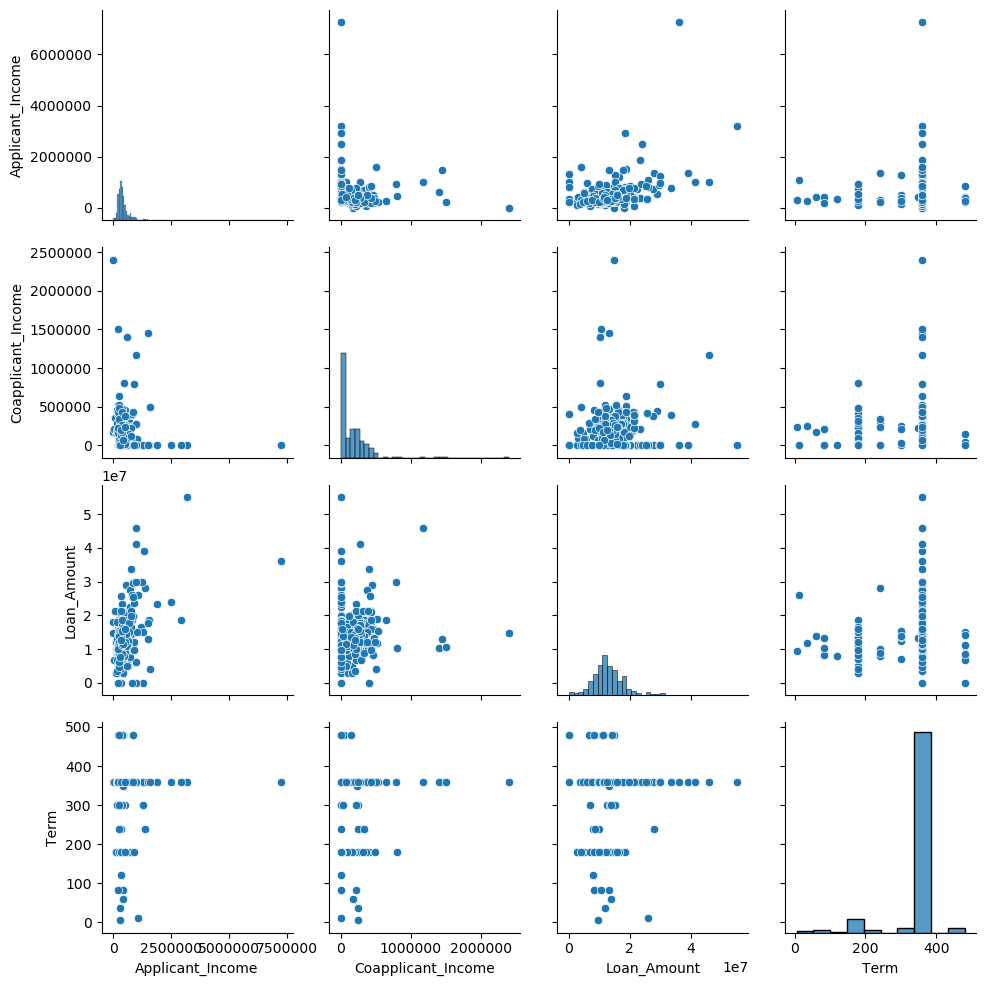

In [57]:
sns.pairplot(loan_t)
plt.show()

In [58]:
loans_C= loans.copy(deep=True)

In [59]:

loan_t = pd.get_dummies(loan_t, columns=["Area"], prefix="Area", prefix_sep="_", drop_first=True)
loans = pd.get_dummies(loans, columns=["Area"], prefix="Area", prefix_sep="_", drop_first=True)


In [60]:
clms= ["Gender","Married", "Dependents", "Education","Self_Employed","Area_Semiurban","Area_Urban"]
for col in clms:
    loans[col].astype(int)
    loan_t[col].astype(int)

In [61]:
loans

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Status,Area_Semiurban,Area_Urban
0,1,0,0,1,0,584900,0.0,15000000,360.0,1.0,1,0,1
1,1,1,1,1,0,458300,150800.0,12800000,360.0,1.0,0,0,0
2,1,1,0,1,1,300000,0.0,6600000,360.0,1.0,1,0,1
3,1,1,0,0,0,258300,235800.0,12000000,360.0,1.0,1,0,1
4,1,0,0,1,0,600000,0.0,14100000,360.0,1.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,290000,0.0,7100000,360.0,1.0,1,0,0
610,1,1,4,1,0,410600,0.0,4000000,180.0,1.0,1,0,0
611,1,1,1,1,0,807200,24000.0,25300000,360.0,1.0,1,0,1
612,1,1,2,1,0,758300,0.0,18700000,360.0,1.0,1,0,1


In [62]:
loan_t

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area_Semiurban,Area_Urban
0,1,1,0,1,0,572000,0,11000000,360.0,1.0,0,1
1,1,1,1,1,0,307600,150000,12600000,360.0,1.0,0,1
2,1,1,2,1,0,500000,180000,20800000,360.0,1.0,0,1
3,1,1,2,1,0,234000,254600,10000000,360.0,0,0,1
4,1,0,0,0,0,327600,0,7800000,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,4,0,1,400900,177700,11300000,360.0,1.0,0,1
363,1,1,0,1,0,415800,70900,11500000,360.0,1.0,0,1
364,1,0,0,1,0,325000,199300,12600000,360.0,0,1,0
365,1,1,0,1,0,500000,239300,15800000,360.0,1.0,0,0


## Linear Regression

In [63]:
train_y= loans["Status"]
trainX=loans.loc[:,~loans.columns.isin(["Status"])]
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(trainX, train_y)
coeff_df = pd.DataFrame(model.coef_,trainX.columns,columns=['Coefficient'])


In [64]:
print(model.intercept_)
coeff_df

0.2381053915970613


,Coefficient
Gender,-3.411145e-03
Married,1.004201e-01
Dependents,-7.153846e-03
Education,5.834911e-02
Self_Employed,1.530687e-02
Applicant_Income,-2.281071e-08
Coapplicant_Income,-7.925575e-08
Loan_Amount,5.603476e-10
Term,-1.915369e-04
Credit_History,4.682007e-01


In [65]:
test_X=loan_t
y_pred = model.predict(test_X)

In [66]:
loan_tc_lin= loan_t.copy(deep=True)
loan_tc_lin['Status'] = y_pred

In [67]:
loan_tc_lin[loan_tc_lin["Status"] > .65].shape

(271, 13)

In [68]:
loan_tc_lin.describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Area_Semiurban,Area_Urban,Status
count,3.670000e+02,3.670000e+02,3.670000e+02,367.000000,367.000000,367.000000,367.000000
mean,4.805599e+05,1.569578e+05,1.342779e+07,342.822888,0.316076,0.381471,0.673555
std,4.910685e+05,2.334232e+05,6.296143e+06,64.658402,0.465578,0.486411,0.217928
min,0.000000e+00,0.000000e+00,0.000000e+00,6.000000,0.000000,0.000000,0.042169
25%,2.864000e+05,0.000000e+00,1.000000e+07,360.000000,0.000000,0.000000,0.625886
50%,3.786000e+05,1.025000e+05,1.250000e+07,360.000000,0.000000,0.000000,0.757887
75%,5.060000e+05,2.430500e+05,1.575000e+07,360.000000,1.000000,1.000000,0.819488
max,7.252900e+06,2.400000e+06,5.500000e+07,480.000000,1.000000,1.000000,0.946153


## Logistic Regression

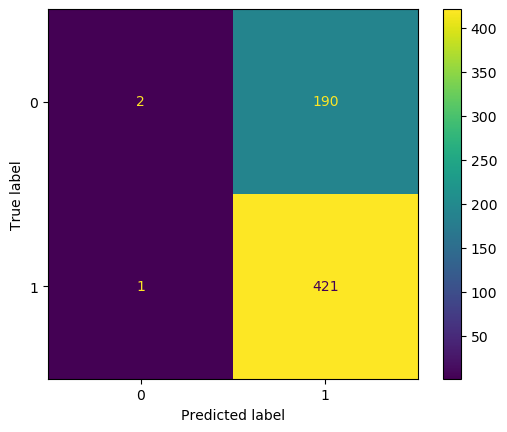

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
log_mod= LogisticRegression()
log_mod.fit(trainX, train_y)
train_pred = log_mod.predict(trainX)
cm_log= confusion_matrix(train_y,train_pred)
ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=log_mod.classes_).plot()
plt.show()

In [70]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
print("Accuracy:",accuracy_score(train_y, train_pred))
print("precision score: ", precision_score(train_y,train_pred))
print("recall score: ", recall_score(train_y,train_pred))
print("f1-score: ", f1_score(train_y,train_pred))

Accuracy: 0.6889250814332247
precision score:  0.6890343698854338
recall score:  0.9976303317535545
f1-score:  0.8151016456921589


In [71]:
loan_T_log = loan_t.copy(deep=True)
loan_T_log["Status"] = log_mod.predict(test_X)
print(loan_T_log["Status"].value_counts())
loan_T_log[loan_T_log["Status"]==0]

1    366
0      1
Name: Status, dtype: int64


,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area_Semiurban,Area_Urban,Status
325,1,0,0,1,0,287500,241600,9500000,6.0,0.0,1,0,0


## <center>Decision Trees</center>


In [88]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth =4, random_state= 1)
dt.fit(trainX,train_y)

DecisionTreeClassifier(max_depth=4, random_state=1)

Accuracy: 0.7899022801302932
precision score:  0.8097251585623678
recall score:  0.9075829383886256
f1-score:  0.8558659217877094


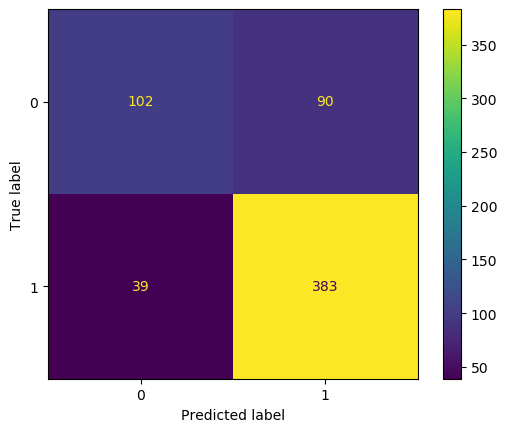

In [99]:
pred_dt= dt.predict(trainX)
print("Accuracy:",accuracy_score(train_y, pred_dt))
print("precision score: ", precision_score(train_y,pred_dt))
print("recall score: ", recall_score(train_y,pred_dt))
print("f1-score: ", f1_score(train_y,pred_dt))
cm_dt= confusion_matrix(train_y,pred_dt)
ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=dt.classes_).plot()
plt.show()

In [92]:
loan_T_dt = loan_t.copy(deep=True)
loan_T_dt["Status"] = dt.predict(test_X)
print(loan_T_dt["Status"].value_counts())
loan_T_dt[loan_T_dt["Status"]==0]

1    279
0     88
Name: Status, dtype: int64


,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area_Semiurban,Area_Urban,Status
3,1,1,2,1,0,234000,254600,10000000,360.0,0,0,1,0
7,1,1,2,0,0,388100,0,14700000,360.0,0.0,0,0,0
12,1,0,4,1,0,416600,0,4000000,180.0,0,0,1,0
13,1,1,2,1,1,1217300,0,16600000,360.0,0.0,1,0,0
26,1,1,2,1,0,436300,125000,14000000,360.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,1,0,1,0,339100,196600,13300000,360.0,0.0,0,0,0
354,1,1,4,0,0,531600,18700,15800000,180.0,0.0,1,0,0
358,1,1,2,0,0,313200,0,7600000,360.0,0,0,0,0
360,0,1,0,1,0,855000,425500,9600000,360.0,0,0,1,0


In [91]:
imptcs = pd.DataFrame(dt.feature_importances_,trainX.columns)
imptcs

,0
Gender,0.000000
Married,0.000000
Dependents,0.000000
Education,0.000000
Self_Employed,0.000000
Applicant_Income,0.000000
Coapplicant_Income,0.084653
Loan_Amount,0.027793
Term,0.103738
Credit_History,0.724166


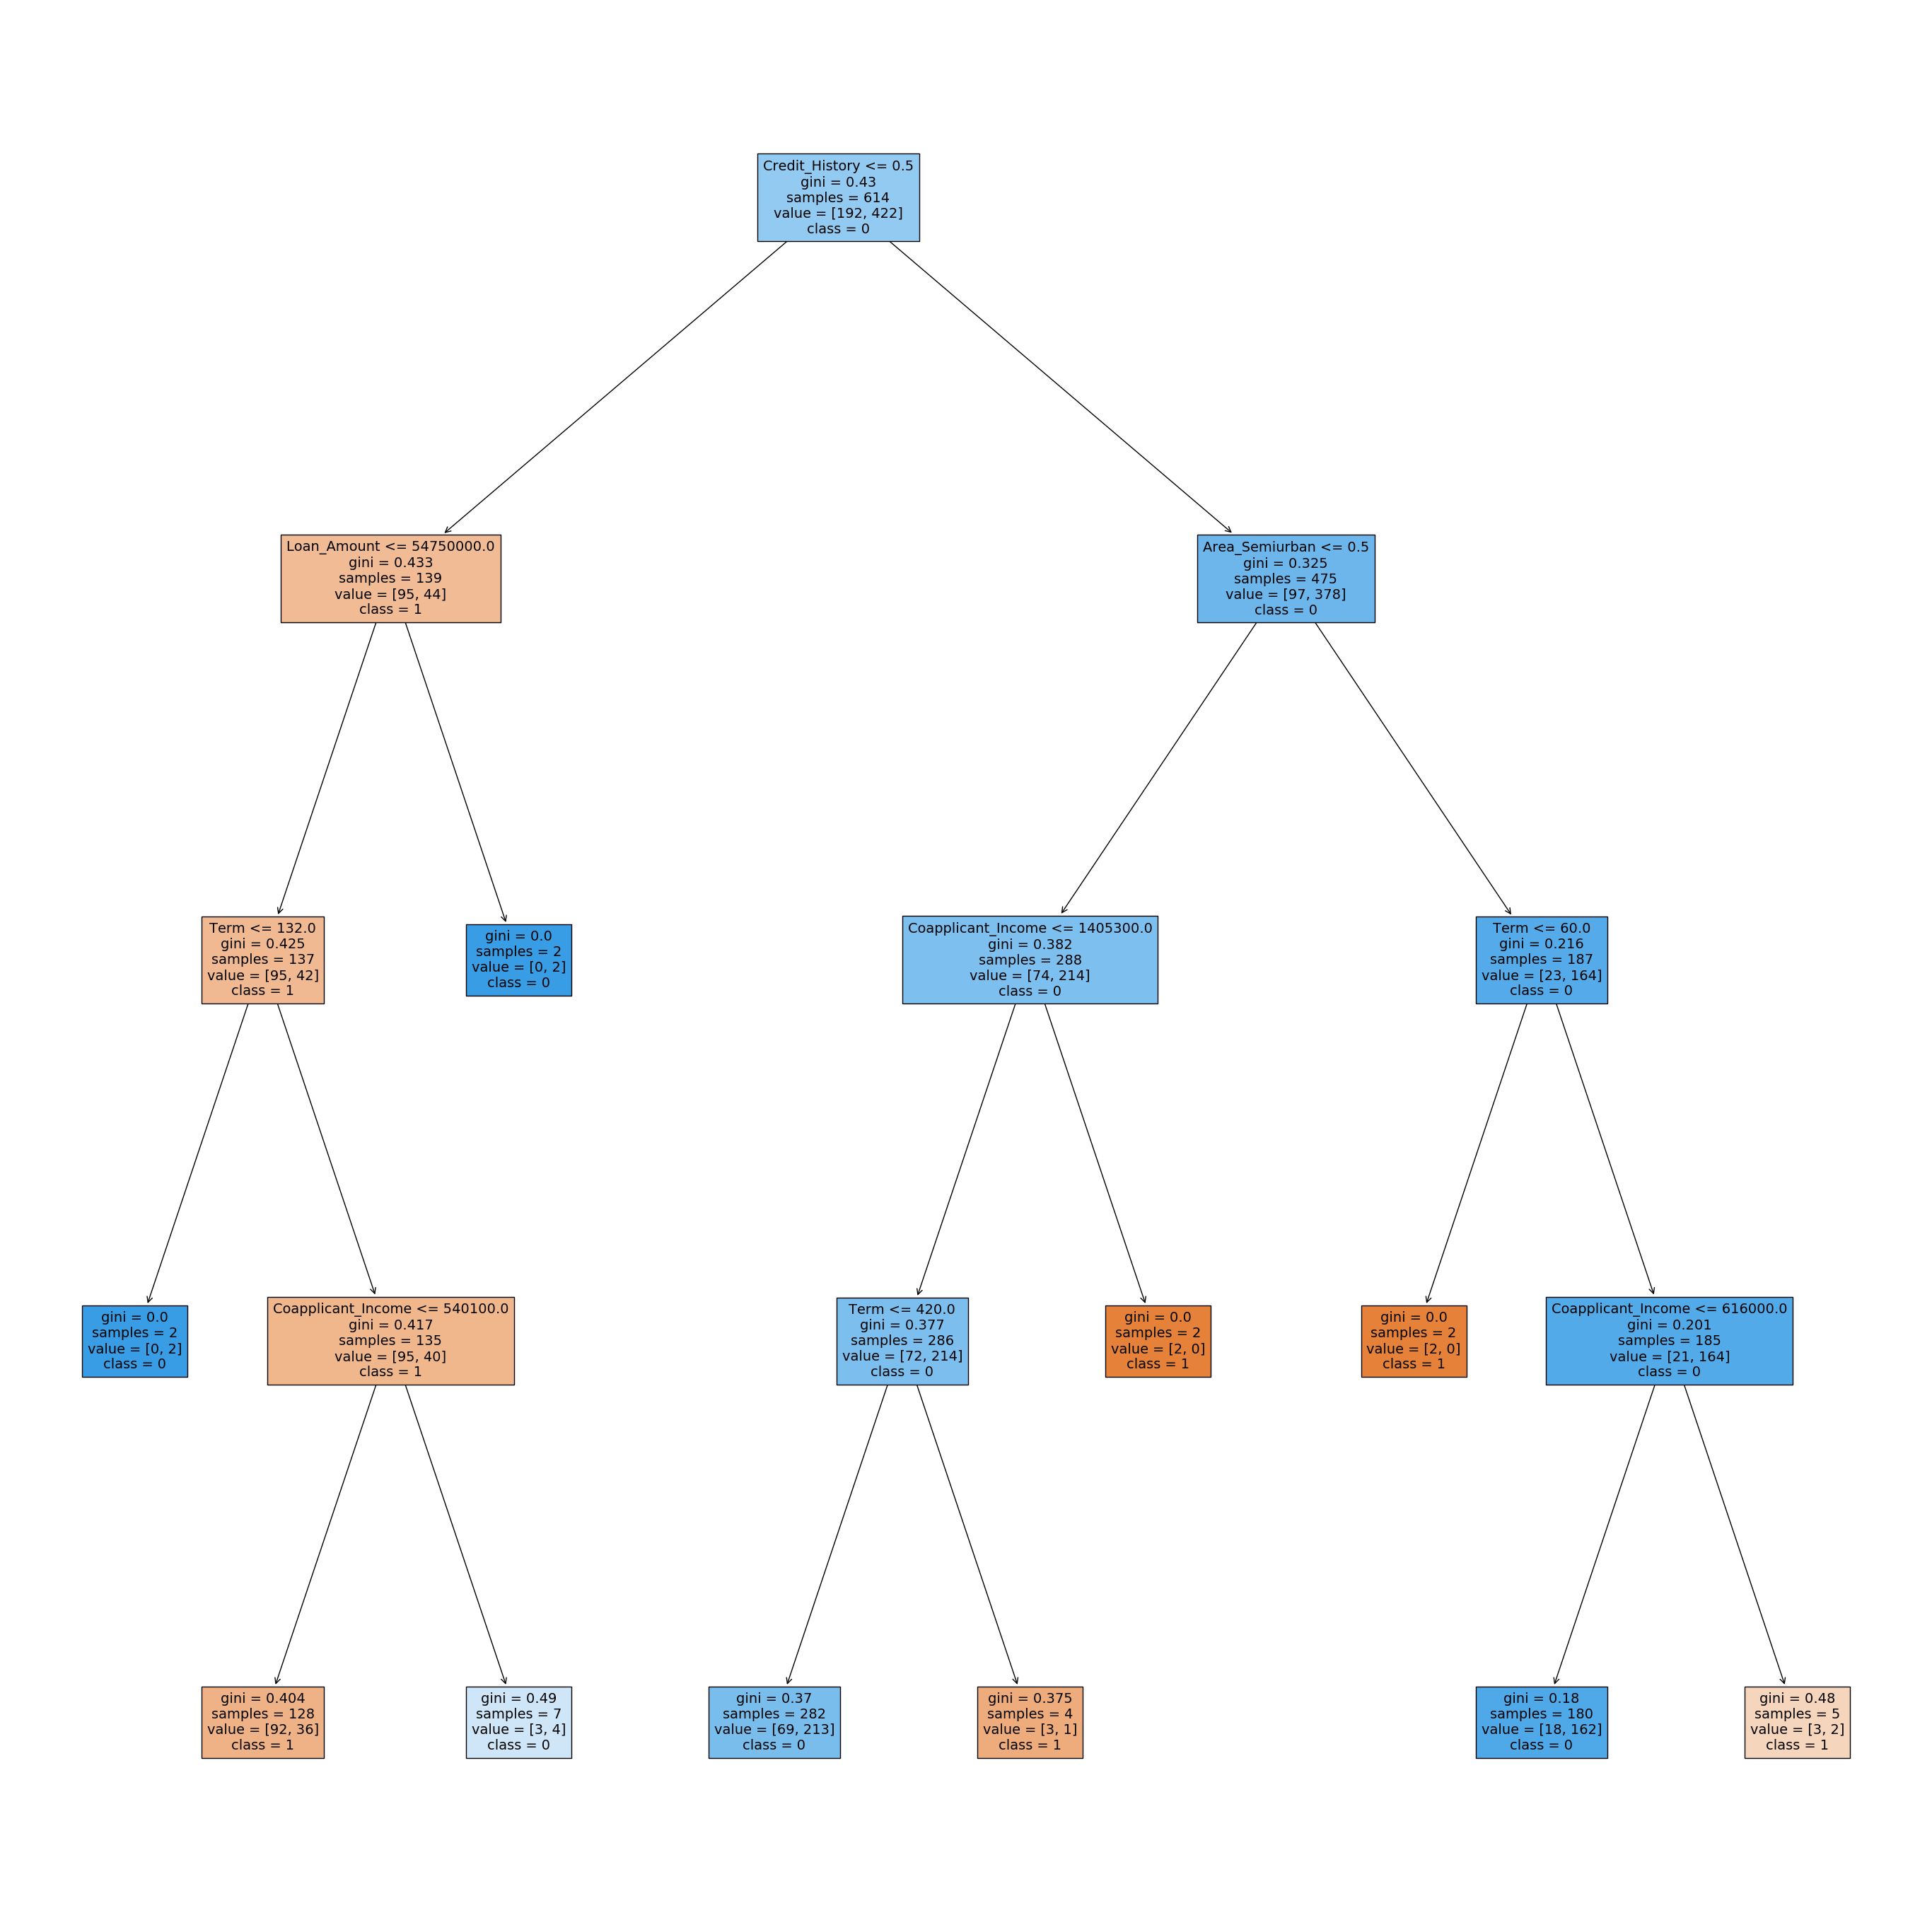

In [90]:
from sklearn.tree import plot_tree
fig= plt.figure(figsize=(35,35))
_ = plot_tree(dt, feature_names=trainX.columns, class_names=train_y.astype(str),filled=True)

According to the decision tree, the most important factor was the applicant's credit history, which accounts for 72.4% of the variabiliy of the dataset. The next determining factor was the term of the loan, followed by co-applicant income. Gender, marital status, family size, education, self-employment, and, surprisingly, applicant income did not play a part in the decision to grant a loan.

## <center>Neural Net</center>

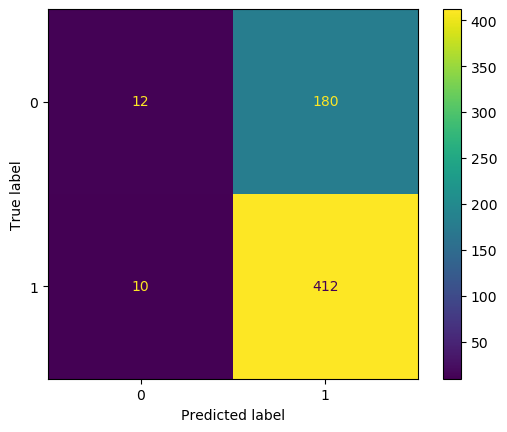

In [95]:
from sklearn.neural_network import MLPClassifier
nn= MLPClassifier()
nn.fit(trainX,train_y)
pred_nn= nn.predict(trainX)
cm_nn= confusion_matrix(train_y,pred_nn,labels=nn.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm_nn, display_labels=nn.classes_).plot()
plt.show()

In [96]:
print("Accuracy:",accuracy_score(train_y, pred_nn))
print("precision score: ", precision_score(train_y,pred_nn))
print("recall score: ", recall_score(train_y,pred_nn))
print("f1-score: ", f1_score(train_y,pred_nn))


Accuracy: 0.6905537459283387
precision score:  0.6959459459459459
recall score:  0.976303317535545
f1-score:  0.8126232741617356
